# Zillow CSV ETL process

This code serves as a blueprint for the csv ETL process. You will need to update certain field and column names in this report according to the csv file name, the metric and report under consideration, and so on. There are annotations provided throughout to guide you through the code.

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Declare Variables

In [2]:
#Add inputs here, and clean csv should auto-populate
raw_csv_path = 'Resources_Raw/raw_perc_listings_price_cut_week_all.csv'
clean_csv_path = 'Resources_Clean/clean_perc_listings_price_cut_week_all.csv'
metric_name = 'Percentage of Listings With Price Cut (%)'

In [3]:
initial_csv = Path(raw_csv_path)
initial_df = pd.read_csv(initial_csv)
initial_df

,RegionID,SizeRank,RegionName,RegionType,StateName,1/13/18,1/20/18,1/27/18,2/3/18,2/10/18,...,9/2/23,9/9/23,9/16/23,9/23/23,9/30/23,10/7/23,10/14/23,10/21/23,10/28/23,11/4/23
0,102001,0,United States,country,NaN,0.048289,0.044279,0.047172,0.048079,0.047539,...,0.084324,0.086064,0.091261,0.090410,0.090925,0.093965,0.091395,0.092427,0.090298,0.091347
1,394913,1,"New York, NY",msa,NY,0.039355,0.037057,0.037613,0.039435,0.036416,...,0.033419,0.045924,0.046643,0.047027,0.044495,0.048608,0.048381,0.051134,0.049100,0.048564
2,753899,2,"Los Angeles, CA",msa,CA,0.055506,0.052349,0.050636,0.051697,0.054797,...,0.059652,0.072151,0.066184,0.068562,0.066404,0.072646,0.072648,0.073022,0.073210,0.077873
3,394463,3,"Chicago, IL",msa,IL,0.066376,0.061356,0.062356,0.066945,0.055990,...,0.084484,0.098833,0.105610,0.102903,0.097691,0.106043,0.104743,0.099614,0.097945,0.101734
4,394514,4,"Dallas, TX",msa,TX,0.068313,0.059395,0.061169,0.058698,0.058176,...,0.125521,0.122744,0.126861,0.124637,0.126677,0.128565,0.130702,0.123969,0.120726,0.122733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.090909,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.031250
922,394743,936,"Ketchikan, AK",msa,AK,0.000000,0.044776,0.015873,0.014925,0.046154,...,0.069767,0.069767,0.000000,0.000000,0.090909,0.048780,0.023256,0.000000,0.025641,0.026316
923,753874,937,"Craig, CO",msa,CO,0.018868,0.019802,0.020619,0.020000,0.000000,...,0.107143,0.111111,0.080460,0.090909,0.097561,0.083333,0.050000,0.023256,0.070588,0.083333
924,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,0.173913,0.041667,0.066667,0.022222,0.041667,0.042553,0.021277,0.042553,0.000000,0.046512


# #NOTE: updated two columns in raw CSV to fill in missing data. Averaged out across missing two weeks from 2/22/20 to 2/29/20

In [4]:
date_columns_slice = initial_df.iloc[:, 5:-1]

#looks at every row in this column range, and checks for null values
date_range_columns = initial_df.loc[:,date_columns_slice.columns] 
null_check = date_range_columns.isna().any(axis=1)

#Reverse filter based on null check for rows without null
null_check_df = initial_df.loc[~null_check, :]

#Preview
null_check_df

,RegionID,SizeRank,RegionName,RegionType,StateName,1/13/18,1/20/18,1/27/18,2/3/18,2/10/18,...,9/2/23,9/9/23,9/16/23,9/23/23,9/30/23,10/7/23,10/14/23,10/21/23,10/28/23,11/4/23
1,394913,1,"New York, NY",msa,NY,0.039355,0.037057,0.037613,0.039435,0.036416,...,0.033419,0.045924,0.046643,0.047027,0.044495,0.048608,0.048381,0.051134,0.049100,0.048564
2,753899,2,"Los Angeles, CA",msa,CA,0.055506,0.052349,0.050636,0.051697,0.054797,...,0.059652,0.072151,0.066184,0.068562,0.066404,0.072646,0.072648,0.073022,0.073210,0.077873
3,394463,3,"Chicago, IL",msa,IL,0.066376,0.061356,0.062356,0.066945,0.055990,...,0.084484,0.098833,0.105610,0.102903,0.097691,0.106043,0.104743,0.099614,0.097945,0.101734
4,394514,4,"Dallas, TX",msa,TX,0.068313,0.059395,0.061169,0.058698,0.058176,...,0.125521,0.122744,0.126861,0.124637,0.126677,0.128565,0.130702,0.123969,0.120726,0.122733
6,395209,6,"Washington, DC",msa,VA,0.045571,0.046264,0.043622,0.045640,0.042553,...,0.080084,0.085533,0.101659,0.096705,0.096330,0.107001,0.100026,0.099125,0.103444,0.102656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,394342,929,"Atchison, KS",msa,KS,0.061538,0.000000,0.045455,0.046875,0.016667,...,0.081081,0.050000,0.083333,0.130435,0.155556,0.046512,0.062500,0.125000,0.133333,0.023256
917,753880,930,"Fairfield, IA",msa,IA,0.037500,0.000000,0.054054,0.013158,0.014085,...,0.055556,0.092593,0.092593,0.035088,0.064516,0.096774,0.048387,0.103448,0.118644,0.086207
919,395142,933,"Sweetwater, TX",msa,TX,0.047619,0.046875,0.015152,0.045455,0.015873,...,0.077922,0.044118,0.082192,0.111111,0.028169,0.120000,0.053333,0.025974,0.040541,0.026667
922,394743,936,"Ketchikan, AK",msa,AK,0.000000,0.044776,0.015873,0.014925,0.046154,...,0.069767,0.069767,0.000000,0.000000,0.090909,0.048780,0.023256,0.000000,0.025641,0.026316


# Condense Date Columns to Single Column

In this section, we condense the multiple date columns into a single 'date' column. This allows for easier data visualization moving forward.

In [5]:
condensed_rough_df = pd.DataFrame(null_check_df)

new_rows = []

#For loop to iterate through each RegionName
for _, row in condensed_rough_df.iterrows():
    region_ID = row['RegionID']
    size_rank = row['SizeRank']
    region_name = row['RegionName']
    region_type = row['RegionType']
    state_name = row['StateName']
    
    #For loop to iterate through each Date Column within a given RegionName
    for date_column in condensed_rough_df.columns[5:]:
        date = pd.to_datetime(date_column)
        value = row[date_column]
        
        #Add 'Date' and 'value' values for a given Date and Region into new_rows list.
        new_rows.append([region_ID,size_rank,region_name,region_type,state_name, date, value])

#New df based on new_rows 'list'
condensed_df = pd.DataFrame(new_rows, columns=
                             ['Region ID',
                              'Size Rank',
                              'Region Name',
                              'Region Type',
                              'State Name',
                              'Date',
                              metric_name])


#create moving average column for each Region.
window_size = 3 #time period (weeks)
condensed_df[f'{metric_name} Rolling Avg'] = condensed_df.groupby('Region Name')[metric_name].rolling(window=window_size).mean().reset_index(level=0, drop=True)

#preview df
condensed_df

,Region ID,Size Rank,Region Name,Region Type,State Name,Date,Percentage of Listings With Price Cut (%),Percentage of Listings With Price Cut (%) Rolling Avg
0,394913,1,"New York, NY",msa,NY,2018-01-13,0.039355,NaN
1,394913,1,"New York, NY",msa,NY,2018-01-20,0.037057,NaN
2,394913,1,"New York, NY",msa,NY,2018-01-27,0.037613,0.038008
3,394913,1,"New York, NY",msa,NY,2018-02-03,0.039435,0.038035
4,394913,1,"New York, NY",msa,NY,2018-02-10,0.036416,0.037821
...,...,...,...,...,...,...,...,...
180875,753874,937,"Craig, CO",msa,CO,2023-10-07,0.083333,0.090601
180876,753874,937,"Craig, CO",msa,CO,2023-10-14,0.050000,0.076965
180877,753874,937,"Craig, CO",msa,CO,2023-10-21,0.023256,0.052196
180878,753874,937,"Craig, CO",msa,CO,2023-10-28,0.070588,0.047948


# Analysis Testing

Section I created to test initial clean dataframe. Use only as a referance for chart output.

In [6]:
MSA_filter = ['United States','New York, NY','Los Angeles, CA','Chicago, IL','Dallas, TX']

short_table = condensed_df['Region Name'].isin(MSA_filter)
filtered_df = condensed_df[short_table]

filtered_df

,Region ID,Size Rank,Region Name,Region Type,State Name,Date,Percentage of Listings With Price Cut (%),Percentage of Listings With Price Cut (%) Rolling Avg
0,394913,1,"New York, NY",msa,NY,2018-01-13,0.039355,NaN
1,394913,1,"New York, NY",msa,NY,2018-01-20,0.037057,NaN
2,394913,1,"New York, NY",msa,NY,2018-01-27,0.037613,0.038008
3,394913,1,"New York, NY",msa,NY,2018-02-03,0.039435,0.038035
4,394913,1,"New York, NY",msa,NY,2018-02-10,0.036416,0.037821
...,...,...,...,...,...,...,...,...
1211,394514,4,"Dallas, TX",msa,TX,2023-10-07,0.128565,0.126626
1212,394514,4,"Dallas, TX",msa,TX,2023-10-14,0.130702,0.128648
1213,394514,4,"Dallas, TX",msa,TX,2023-10-21,0.123969,0.127745
1214,394514,4,"Dallas, TX",msa,TX,2023-10-28,0.120726,0.125132


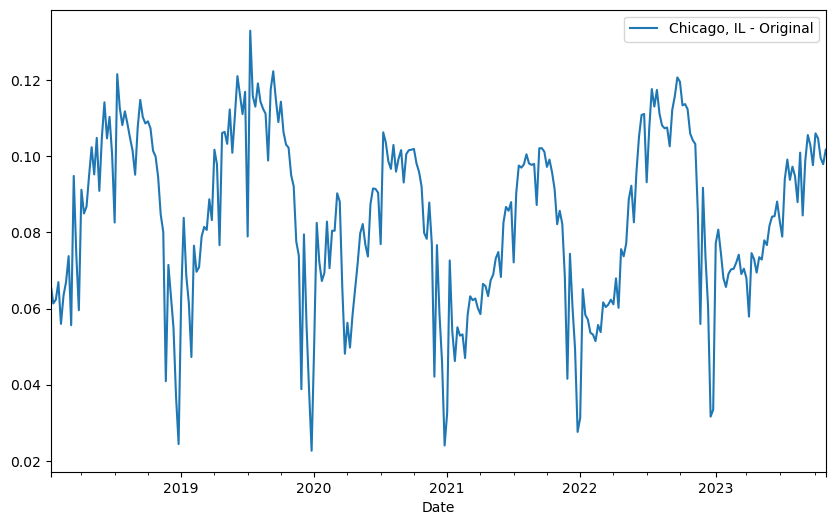

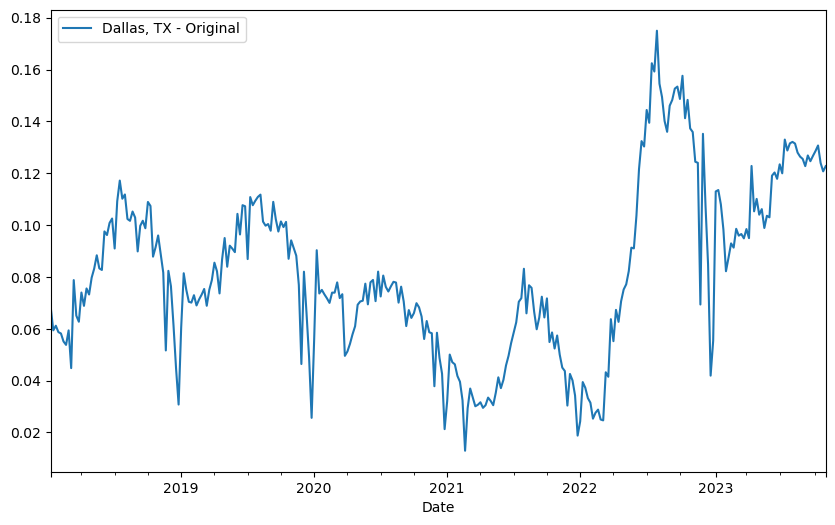

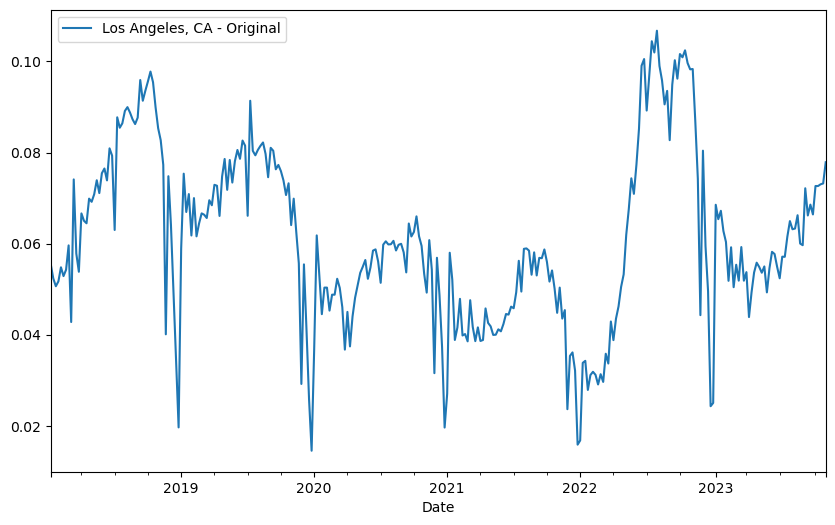

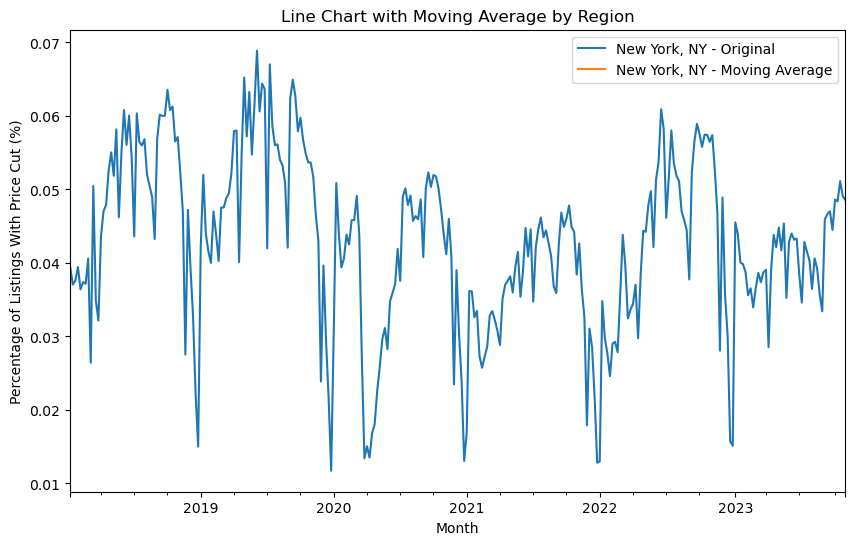

In [7]:
window_size = 3

for region, data in filtered_df.groupby('Region Name'):
    data.plot(kind='line', x='Date', y=metric_name, label=f'{region} - Original', figsize=(10, 6))
    plt.plot(data['Date'], data[f'{metric_name} Rolling Avg'], label=f'{region} - Moving Average')

    
plt.title('Line Chart with Moving Average by Region')
plt.xlabel('Month')
plt.ylabel(metric_name)
plt.legend()
plt.show()

# Generate Clean CSV File

In [9]:
#IMPORTANT -- CHANGE CSV OUTPUT NAME RELEVANT REPORT
condensed_df.to_csv(clean_csv_path, index=False)